In [2]:
import numpy as np
import pandas as pd
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('data/churn.csv')

In [4]:
df = df.drop(columns='RowNumber')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df['Exited'].replace(to_replace={'Лояльные':0, 'Ушедшие':1}, inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
treemap = df.query('Balance >= 0')
px.treemap(data_frame=treemap, path=['Geography', 'Exited', 'NumOfProducts', 'Balance'], values='Tenure', color='Gender')

### Числовые признаки


CustomerId -- идентификатор клиента

Age   -- возраст клиента

Balance  -- баланс на счетах клиента в банке

**NumOfProducts  --  количество услуг банка, которые приобрёл клиент**

EstimatedSalary -- предполагаемая заработная плата клиента

Tenure — сколько лет клиент пользуется услугами банка

### Котегориальные признаки

Surname — фамилия клиента

Geography — страна клиента (банк международный)

Gender — пол клиента

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

CreditScoreCat -- категории кредитного рейтинга клиента (

    
1 *Excellent(1)* 

2 *Fair(0.5)*

3 *Good(0)*

4 *Poor(-0,5)*

5 *Very_Poor(-1)*




## Условие задания:

***Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.***

### 9.1 
***Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.***

In [8]:
px.pie(df, names='Exited',
             title='Соотношение лояльных и ушедших клиентов (график 9.1)',
             width=600, height=300, 
             hole=0.6)


### Анатация:
 На графике 9.1 
соотношение лояльных (синий) и ушедщих (красный) клиентов видно, что ушедших клиентов чуть больше **20%**, лояльных почти **80%** с разницей почти в **60%**

### 9.2.
***Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.***

In [9]:
money_df = df[df['Balance']>=2500].sort_values(by='Age', ascending=True)
px.histogram(money_df, x='Balance', color='Gender', facet_col='Gender',
             marginal='box', width=1000, height=400,
             title='''Распределение баланса пользователей, у которых на счету больше 2 500 долларов (график 9.2) ''')

### Анатация:

### 9.3. 
***Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.***

In [10]:
money_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9520,15673180,Onyekaozulu,727,Germany,Female,18,2,93816.70,2,1,0,126172.11,0
2021,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,1,0,0,197322.13,0
9932,15813451,Fleetwood-Smith,677,Spain,Male,18,8,134796.87,2,1,1,114858.90,0
3686,15665327,Cattaneo,706,France,Male,18,2,176139.50,2,1,0,129654.22,0
1619,15770309,McDonald,656,France,Male,18,10,151762.74,1,0,1,127014.32,0


In [11]:
px.box(money_df, x='Balance', color='Exited', 
       width=800, height=300, labels={'Exited':'Статус клиента'},
       title='распределение баланса клиента в разрезе признака оттока')

In [12]:
px.box(money_df, x='Balance', color='Exited', y='CreditScoreCat', orientation='h',
       width=1000, height=400, labels={'Exited':'Статус клиента'},
       title='распределение баланса клиента в разрезе признака оттока по категориям кредитного рейтинга')

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] but received: CreditScoreCat

In [ ]:
px.histogram(money_df, x='CreditScoreCat', facet_col='NumOfProducts', facet_row='Exited', color='Gender',
       width=1200, height=600, labels={'Exited':'Статус клиента'},
       title='распределение баланса клиента в разрезе признака оттока по категориям возрастным группам')

Описание:

### 9.4. 
***Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?***

In [ ]:
px.box(money_df, x='Age', color='Exited',
       width=800, height=400,
       facet_row='Exited', facet_col='Gender',
       labels={'Exited':'Статус'},
       title='распределение возраста клиента в разрезе признака оттока')

Описание:

### 9.5. 
***Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.***

In [ ]:
df_salary = df.groupby(['CreditScoreCat', 'Exited'], as_index=False)['EstimatedSalary'].median()
df_salary.head()
       

,CreditScoreCat,Exited,EstimatedSalary
0,Excellent,0,105206.480
1,Excellent,1,87071.180
2,Fair,0,101418.050
3,Fair,1,101365.870
4,Good,0,98858.075


In [ ]:
px.histogram(df_salary, x='CreditScoreCat', y='EstimatedSalary', color='Exited', facet_row='Exited', text_auto=True, width=800, height=600, title='взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')

Описание:

### 9.6
***Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.***

In [ ]:
px.histogram(df_gones, x='Exited', 
             facet_col='Gender', 
             color='Gender',
             width=600, height=300, 
             )

### 9.7. 
***Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.***

Описание:

### 9.8. 
***Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?***

In [ ]:
df_activ = df.groupby(['Geography', 'IsActiveMember'], as_index=False)['Exited'].value_counts()
df_activ

,Geography,IsActiveMember,Exited,count
0,France,0,0,1911
1,France,0,1,512
2,France,1,0,2293
3,France,1,1,298
4,Germany,0,0,743
5,Germany,0,1,518
6,Germany,1,0,952
7,Germany,1,1,296
8,Spain,0,0,893
9,Spain,0,1,272


In [ ]:
px.bar(df_activ, x='Geography', y='count', facet_col='IsActiveMember', color='Geography', facet_row='Exited', width=800, height=500)

Описание:

### 9.9. 
***В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.***

In [ ]:
df_exited = df.query('Exited == 1')
df_exitedSiti = df_exited.groupby('Geography', as_index=False)['Exited'].value_counts()
#

In [ ]:
df_exitedSiti.head()

,Geography,Exited,count
0,France,1,810
1,Germany,1,814
2,Spain,1,413


Описание:

In [ ]:
px.scatter_geo(df_exitedSiti, 
               color='count', 
               size='count', 
               locationmode='country names', 
               scope ='europe', 
               fitbounds ='locations', 
               locations='Geography',             
               text='count',
               width=800, height=500,
               title='Количество ушедших клиентов')

In [ ]:
px.pie(df_exitedSiti, names='Geography', values='count', width=600, height=300)

#### 9.10. 
***Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.***

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [ ]:
df['CreditScoreCat']= df['CreditScore'].aggregate(get_credit_score_cat).astype('category')

***Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.***

***На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.***

In [ ]:
df_pivotT = df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0,
)

In [ ]:
df_pivotT

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


In [ ]:
px.imshow( df_pivotT, text_auto='.2f', width=800, height=500)

In [ ]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

18-30 30-45 45-63 63-92

In [ ]:
def CatAge(age):
    if age >= 18 and age < 25:
        return 'age_18-25'
    elif age >= 25 and age < 35:
        return 'age_25-35'
    elif age >= 35 and age < 45:
        return 'age_35-45'
    elif age >= 45 and age <= 55:
        return 'age_45-55'
    elif age >= 55 and age < 63:
        return 'age_55-63'
    elif age >= 63 and age < 92:
        return 'age_63-92'

In [ ]:
df['Cat_Age']  = df['Age'].aggregate(CatAge).astype('category')

In [25]:
df.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df_pivot_age = df.pivot_table(
    values='HasCrCard',
    index= 'Tenure',
    columns='CreditScoreCat',
    aggfunc='mean',
    fill_value=0,)

In [ ]:
df_pivot_age.head()

CreditScoreCat,Excellent,Fair,Good,Poor,Very_Poor
Tenure,,,,,
0,0.550000,0.652174,0.643312,0.679245,0.722222
1,0.697917,0.733945,0.680412,0.624060,0.656716
2,0.696078,0.700000,0.691139,0.725490,0.727273
3,0.722772,0.727273,0.718157,0.718367,0.761905
4,0.736264,0.688073,0.715447,0.711462,0.827586


In [ ]:
px.imshow(df_pivot_age, text_auto='.2f', width=1000, height=600, aspect='auto')

In [ ]:
df_pivot_tenure = df.pivot_table(
    values='Exited',
    index= 'Tenure',
    columns='Cat_Age',
    aggfunc='mean',
    fill_value=0,)

In [ ]:
df_pivot_tenure.head()

Cat_Age,age_18-25,age_25-35,age_35-45,age_45-55,age_55-63,age_63-92
Tenure,,,,,,
0,0.111111,0.119048,0.201183,0.544118,0.375000,0.062500
1,0.046512,0.049231,0.197500,0.541176,0.574074,0.285714
2,0.073171,0.078125,0.165158,0.445122,0.477273,0.162162
3,0.108696,0.080838,0.175439,0.514706,0.543860,0.277778
4,0.108696,0.076487,0.164865,0.564935,0.485714,0.193548


In [ ]:
px.imshow(df_pivot_tenure, text_auto='.2f', width=1000, height=600, aspect='auto')

Список доступных для изменения параметров можно получить с
помощью функции **axes_style():**

In [ ]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [ ]:
mean_df_balance = df.groupby(['Exited',  'CreditScoreCat',  'Tenure'], as_index=False).agg({'Balance':'median', 'Tenure':'mean'})

In [ ]:
mean_df_balance

,Exited,CreditScoreCat,Balance,Tenure
0,0,Excellent,58137.080,0.0
1,0,Excellent,96404.145,1.0
2,0,Excellent,103129.010,2.0
3,0,Excellent,100344.295,3.0
4,0,Excellent,90757.640,4.0
...,...,...,...,...
105,1,Very_Poor,106557.930,6.0
106,1,Very_Poor,110356.420,7.0
107,1,Very_Poor,111721.330,8.0
108,1,Very_Poor,117758.605,9.0


In [ ]:
px.histogram(mean_df_balance, y='Balance', x='CreditScoreCat', facet_col='Tenure', color='CreditScoreCat', facet_row='Exited', width=1600, height=400)

In [ ]:
mean_df_balance2 = df.groupby(['Exited',  'CreditScoreCat', 'Tenure'], as_index=False).agg({'Balance':'median'})

In [ ]:
mean_df_balance2.head()

,Exited,CreditScoreCat,Tenure,Balance
0,0,Excellent,0,58137.080
1,0,Excellent,1,96404.145
2,0,Excellent,2,103129.010
3,0,Excellent,3,100344.295
4,0,Excellent,4,90757.640


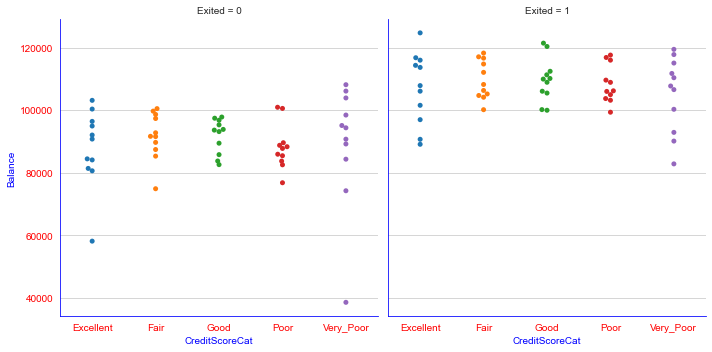

In [ ]:
sns.set_style("whitegrid", {'axes.labelcolor':"b", 'axes.edgecolor':'b',
'xtick.color':'r', 'ytick.color':'r'})
sp =sns.catplot(x='CreditScoreCat', y='Balance', kind='swarm', data=mean_df_balance2, orient='v', col='Exited', hue='CreditScoreCat')

